In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = [24, 12]

In [3]:
timings={}
memory_usage={}
disease_stats={}
versions=["v1.3","v1.5","v1.6","v1.6_copy"]
for version in versions:
    with open(version+"/timings.json") as file:
        data=json.load(file)
        size=len(data)+1
        total=[0 for i in range(size)]
        gen_exposures=[0 for i in range(size)]
        apply_exposures=[0 for i in range(size)]
        apply_interventions=[0 for i in range(size)]

        for index,entry in enumerate(data):
            total[index]=entry["total"]
            gen_exposures[index]=entry["Generate Exposures"]
            apply_exposures[index]=entry["Apply Exposures"]
            apply_interventions[index]=entry["Apply Interventions"]
        timings[version]={"Total":total,"Generate Exposures":gen_exposures,"Apply Exposures":apply_exposures,"Apply Interventions":apply_interventions}
    with open(version+"/memory.json") as file:
        data=json.load(file)
        data=list(map(lambda entry:float(entry.split(" ")[0]),data))
        memory_usage[version]=data
    with open(version+"/global_stats.json") as file:
        data=json.load(file)
        size = len(data)+1
        susceptible = [0 for i in range(size)]
        exposed = [0 for i in range(size)]
        infected = [0 for i in range(size)]
        removed = [0 for i in range(size)]
        vaccinated = [0 for i in range(size)]
        for entry in data:
            susceptible[entry["time_step"]] = entry["susceptible"]
            exposed[entry["time_step"]] = entry["exposed"]
            infected[entry["time_step"]] = entry["infected"]
            removed[entry["time_step"]] = entry["recovered"]
            vaccinated[entry["time_step"]] = entry["vaccinated"]
        disease_stats[version]={"susceptible": susceptible, "exposed": exposed, "infected": infected, "removed": removed,
                             "vaccinated": vaccinated}

In [4]:
# Pad All the data so matplot doesn't have a fit
size=0
for data in timings.values():
    for sub_data in data.values():
        size=max(len(sub_data),size)
size=1428
for  version_data in timings.values():
    for  data in version_data.values():
        data.extend([0 for i in range(size-len(data))])

size=0
for data in memory_usage.values():
    size=max(len(sub_data),size)
size=1428
for version_data in memory_usage.values():
    print(len(version_data),)
    version_data.extend([version_data[-1] for i in range(size-len(version_data))])
    print("\t",len(version_data))


# Pad All the data so matplot doesn't have a fit
size=1428
for data in disease_stats.values():
    for sub_data in data.values():
        size=max(len(sub_data),size)
for  version_data in disease_stats.values():
    for  data in version_data.values():
        data.extend([0 for i in range(size-len(data))])




791
	 1428
874
	 1428
1426
	 1428
1210
	 1428


In [5]:
size

1428

Text(0.5, 0.98, 'Memory Usage in GB per time step')

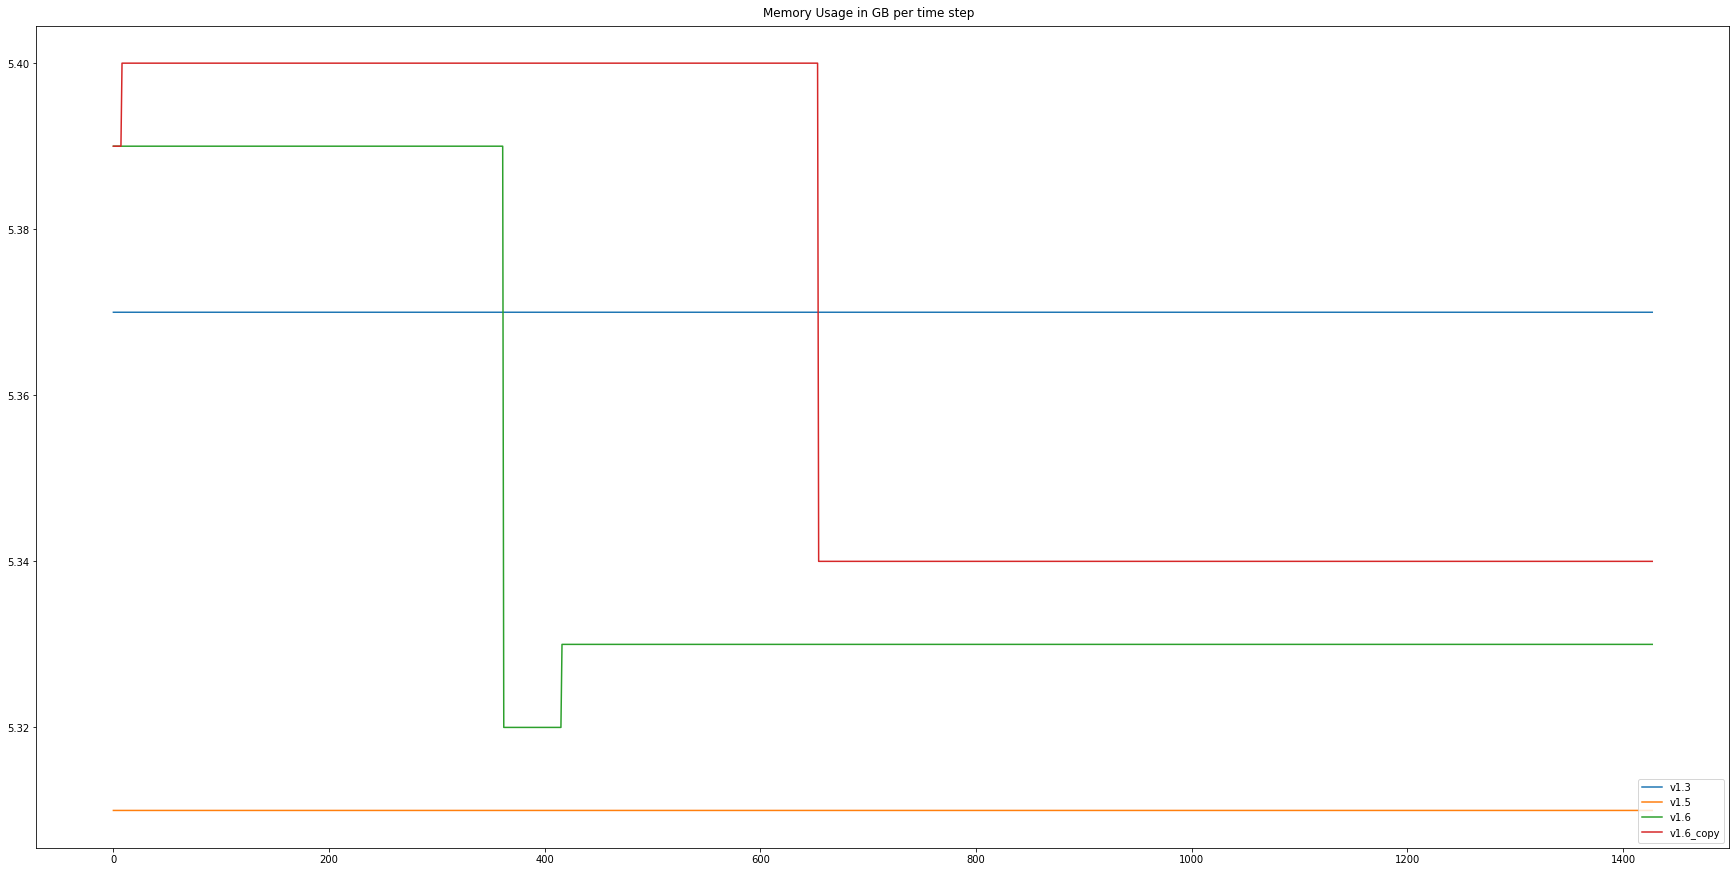

In [6]:
fig,axes=plt.subplots(constrained_layout=True)
for version_name,version_data in memory_usage.items():
    axes.plot(range(0,size),version_data,label=version_name)
    axes.legend(loc="lower right")
fig.suptitle("Memory Usage in GB per time step")

Text(0.5, 0.98, 'Disease Stats Per Time Step')

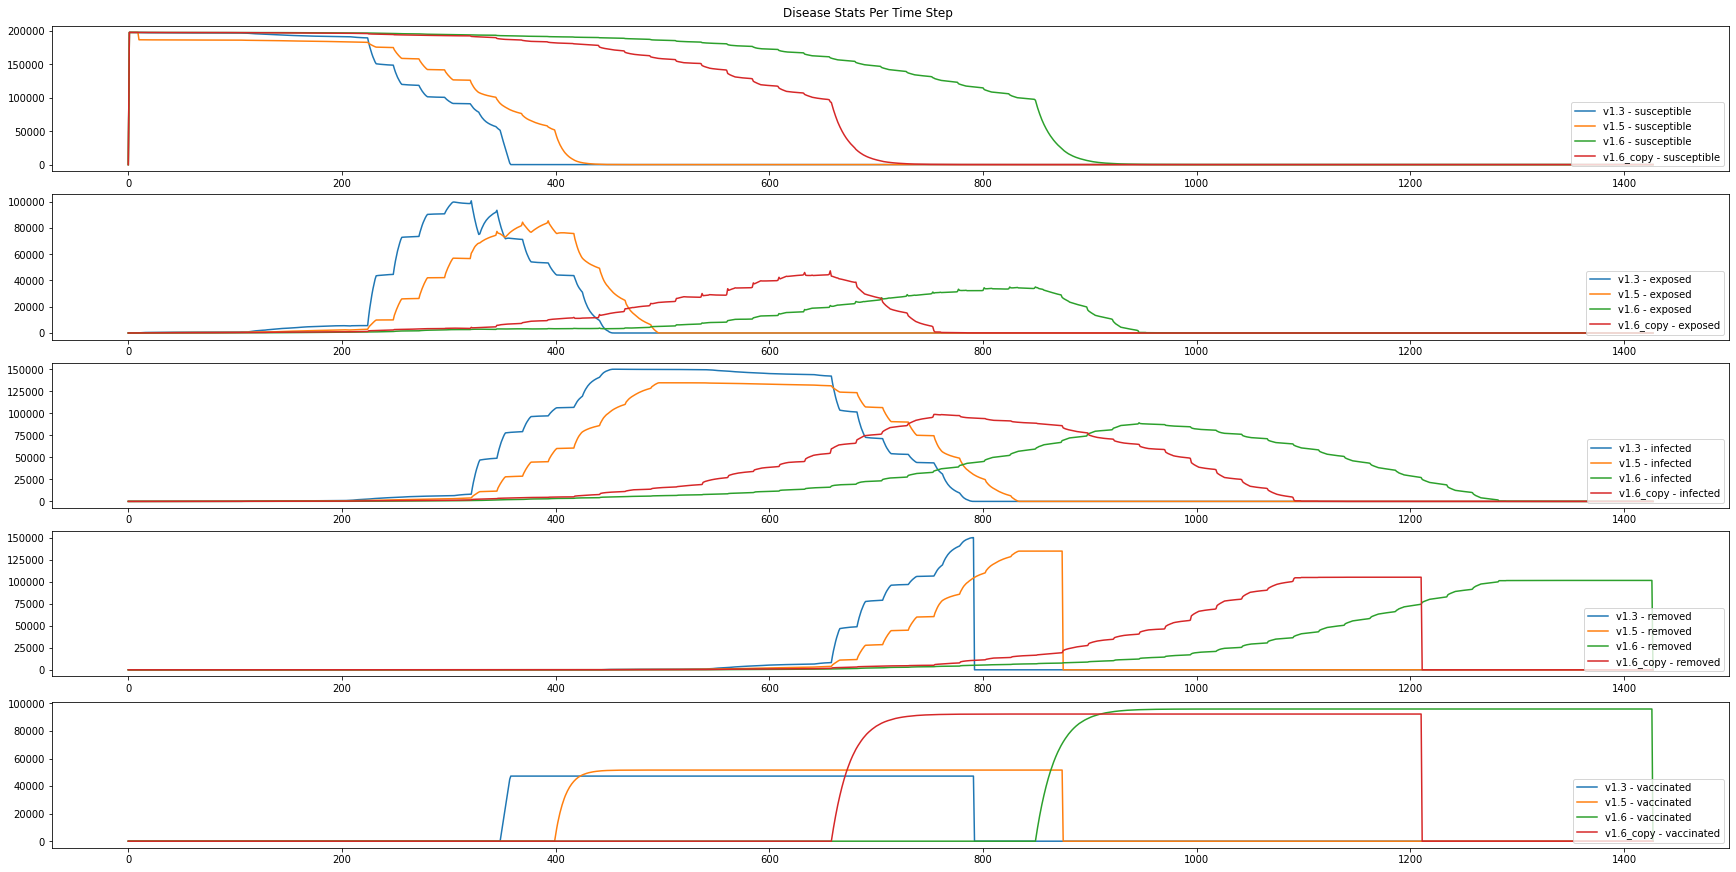

In [7]:
fig,axes=plt.subplots(len(disease_stats[list(disease_stats.keys())[0]].keys()),constrained_layout=True)
for index,function_name in enumerate(disease_stats[list(disease_stats.keys())[0]].keys()):
    for version_name,version_data in disease_stats.items():
        axes[index].plot(range(0,size),version_data[function_name],label=version_name+" - "+function_name)
        axes[index].legend(loc="lower right")
fig.suptitle("Disease Stats Per Time Step")